(284, 313, 4)
355568
<class 'numpy.ndarray'>
(284, 313, 4)


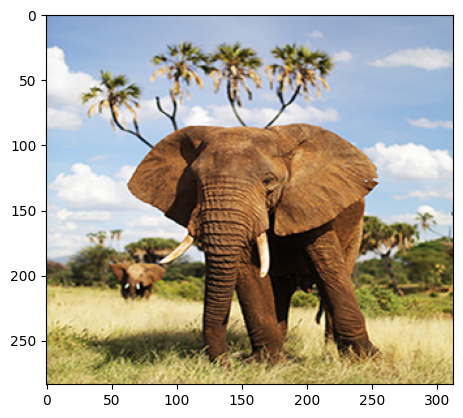

In [ ]:
#reading colored image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
image_path="elephant.png"
img=imread(image_path)
print(img.shape) #HEIGTH,WIDTH,CHANNELS   ,(y,x,c)
print(img.size)#H*W*C
print(type(img))#Defines class
plt.imshow(img)
#plt.show()

#normalize the values
x=img/255
print(x.shape)
#plt.imshow(x)

(284, 313)
88892


1.0

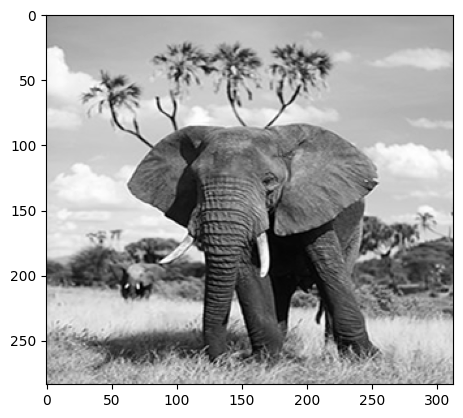

In [ ]:
#grey image reading
img=imread(image_path,as_gray=True)
print(img.shape)
print(img.size)
plt.imshow(img,cmap=plt.get_cmap("gray"))
#plt.show()
np.min(img)
np.max(img)


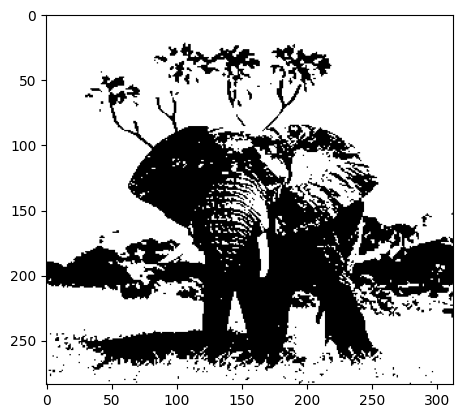

In [ ]:
#gray to black  and white
np.min(img)
np.max(img)
cutoff=np.max(img)/2
img[img<cutoff] = 0
img[img >= cutoff] =1
plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()

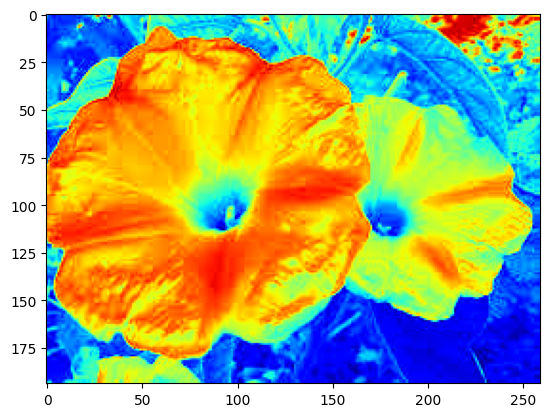

In [ ]:
#GRAY to COLORED
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
gray_image = Image.open('flower.jpeg').convert('L')

# Convert grayscale image to numpy array
gray_array = np.array(gray_image)

# Apply colormap using Matplotlib
color_array = cm.jet(gray_array/255)  # Normalize to [0, 1] for colormap

# Convert the color-mapped array to an 8-bit RGB image
rgb_array = (color_array[:, :, :3] * 255).astype(np.uint8)  # Discard alpha channel

# Create a PIL Image from the numpy array
rgb_image = Image.fromarray(rgb_array, 'RGB')

# Save or display the RGB image
#rgb_image.save('color_mapped_image.png')
#rgb_image.show()
plt.imshow(rgb_image)

<class 'numpy.ndarray'>


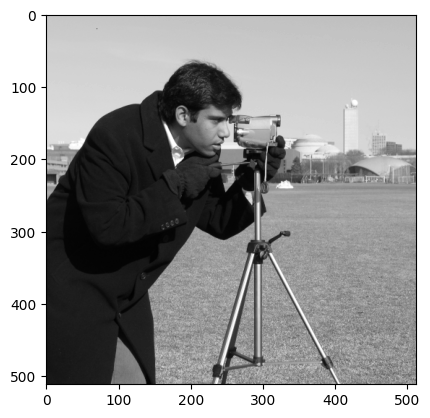

In [ ]:
#exploration of inbuilt images:explore numpy
#gray colored
from skimage import data
camera=data.camera()#camera is one image
print(type(camera))
#print(camera.shape)
#print(camera.size)
#retriving statistical info about gray values
#print(camera.min(),camera.max(),camera.mean())

#numpy array is used to get pixel values and also can modify
#print(camera[20,70])
camera[20,70]=0
#print(camera[20,70])
def show_image(img, cmap='gray', row_plot = 1):
    if not isinstance(img, list):
        img = [img]

    if len(img) == 1:
        plt.imshow(img[0], cmap=cmap) # cm.gray
    else:
        # Get column count
        col_plot = len(img) // row_plot
        fig, axes = plt.subplots(row_plot, col_plot)
        for count in range(len(img)): # count= 1
            axes[count].imshow(img[count], cmap=cmap)
    plt.show()
    return
show_image(camera)

nrows, ncols = camera.shape

row, col = np.ogrid[:nrows, :ncols] # which returns an open (i.e. not fleshed out) mesh-grid when
#indexed, so that only one dimension of each returned array is greater than 1.  The dimension and
#number of the output arrays are equal to the number of indexing dimensions.
row.shape, col.shape
len(row), len(col[0])

# See the output and then understand this logic
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera[outer_disk_mask] = 0
#show_image(camera)


In [ ]:
#colored images
#cat=data.chelsea()
#show_image(cat)
#cat.shape
#cat[10,20]#(r , g, b)
#cat[50,:]=(255,0,0) #red line will be seen at that picture
#show_image(cat,None)

image_path="pic1.jpg"
img=imread(image_path)

In [ ]:
#converting the image into float and unsignedbyte
from skimage import data
from skimage import img_as_float,img_as_ubyte
cat=data.chelsea()
image_float=img_as_float(cat)
image_ubyte=img_as_ubyte(cat)
print(image_float.min(),image_float.max(),image_float.dtype,image_float.shape)
print(image_ubyte.min(),image_ubyte.max(),image_ubyte.dtype,image_ubyte.shape)


0.0 0.9058823529411765 float64 (300, 451, 3)
0 231 uint8 (300, 451, 3)


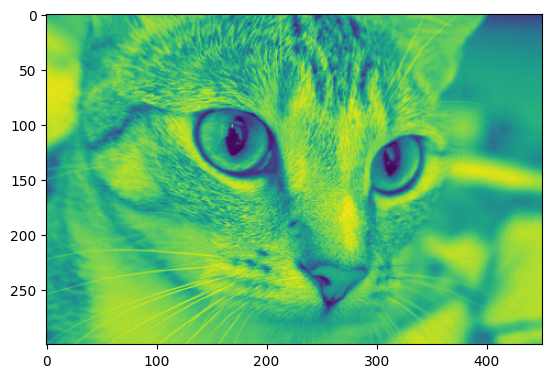

In [ ]:

red_channel=cat[:,:,0]#0 is red channel obv that's all not red
green_channel=cat[:,:,1] #1 is green,2 is blue
blue_channel=cat[:,:,2]
plt.imshow(red_channel)

In [ ]:
#plt.imshow(green_channel)

In [ ]:
#plt.imshow(blue_channel)

(<Axes: >, <Axes: xlabel='intensity', ylabel='# pixels'>)

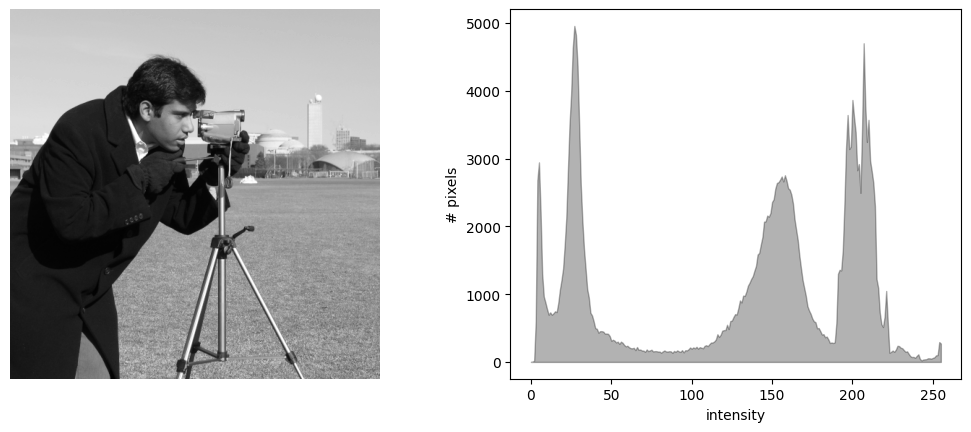

In [ ]:
#HISTOGRAM of gray image
from skimage import exposure
camera=data.camera()
def _plot_histogram(ax, image, alpha=0.3, **kwargs):
    # Use skimage's histogram function which has nice defaults for integer and float images.
    hist, bin_centers = exposure.histogram(image)
    ax.fill_between(bin_centers, hist, alpha=alpha, **kwargs)
    ax.set_xlabel('intensity')
    ax.set_ylabel('# pixels')
    return
def plot_histogram(image, ax=None, **kwargs):
    from skimage import exposure

    ax = ax if ax is not None else plt.gca()

    if image.ndim == 2:
        _plot_histogram(ax, image, color='black', **kwargs)
    elif image.ndim == 3:
        # `channel` is the red, green, or blue channel of the image.
        for channel, channel_color in zip(iter_channels(image), 'rgb'):
            _plot_histogram(ax, channel, color=channel_color, **kwargs)

    return

def match_axes_height(ax_src, ax_dst):
    """ Match the axes height of two axes objects.
    The height of `ax_dst` is synced to that of `ax_src`.
    """
    # HACK: plot geometry isn't set until the plot is drawn
    plt.draw()
    dst = ax_dst.get_position()
    src = ax_src.get_position()
    ax_dst.set_position([dst.xmin, src.ymin, dst.width, src.height])
    return
def imshow_with_histogram(image, **kwargs):

    width, height = plt.rcParams['figure.figsize']
    fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2*width, height))

    kwargs.setdefault('cmap', plt.cm.gray)
    ax_image.imshow(image, **kwargs)
    plot_histogram(image, ax=ax_hist)

    # pretty it up
    ax_image.set_axis_off()
    match_axes_height(ax_image, ax_hist)
    return ax_image, ax_hist

imshow_with_histogram(camera)

(<Axes: >, <Axes: xlabel='intensity', ylabel='# pixels'>)

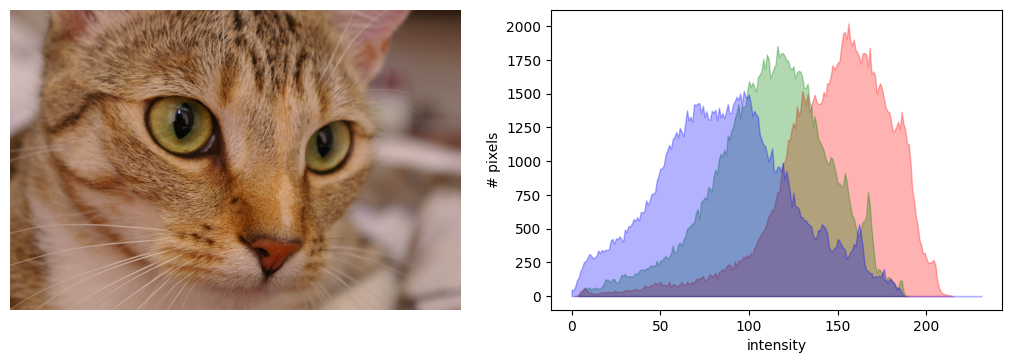

In [ ]:
#HISTOGRAM OF COLORED IMAGE
cat=data.chelsea()

def iter_channels(color_image):
    """Yield color channels of an image."""
    # Roll array-axis so that we iterate over the color channels of an image.
    for channel in np.rollaxis(color_image, -1):
        yield channel
    return


imshow_with_histogram(cat)

In [ ]:

# Plot CDF
def plot_cdf(image, ax=None):
    img_cdf, bins = exposure.cumulative_distribution(image)
    ax.plot(bins, img_cdf, 'r')
    ax.set_ylabel("Fraction of pixels below intensity")
    return

(<Axes: >, <Axes: xlabel='intensity', ylabel='# pixels'>)

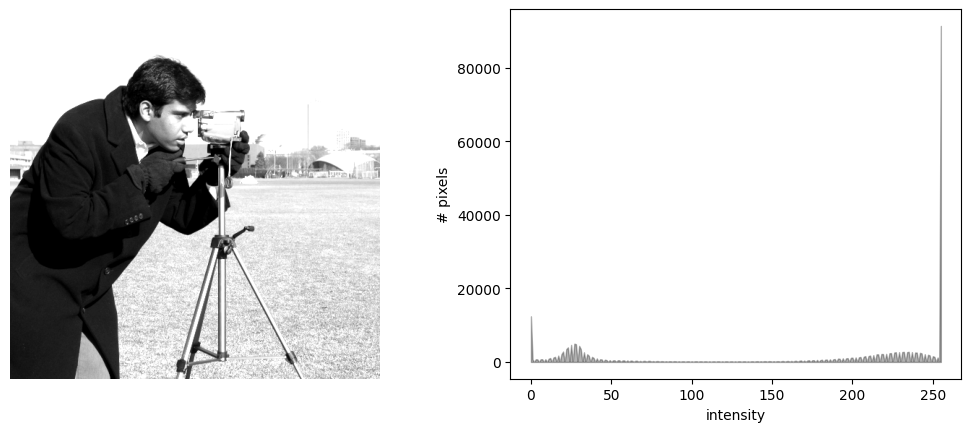

In [ ]:
#high contrast allow us to more easily identify an image
from skimage import exposure
high_contrast=exposure.rescale_intensity(camera,in_range=(10,170))
imshow_with_histogram(high_contrast)


In [ ]:
#THRESHOLDING(separation of foreground from background)
threshold = 50
#ax_image, ax_hist = imshow_with_histogram(camera)
#ax_image.imshow(camera > threshold)
#ax_hist.axvline(threshold, color='red')

#One of the most popular thresholding methods is Otsu's method, which gives a slightly different
#threshold than the one we defined above:

# Rename module so we don't shadow the builtin function
from skimage import filters
threshold = filters.threshold_otsu(camera)
print(threshold)

#plt.imshow(camera > threshold)


102


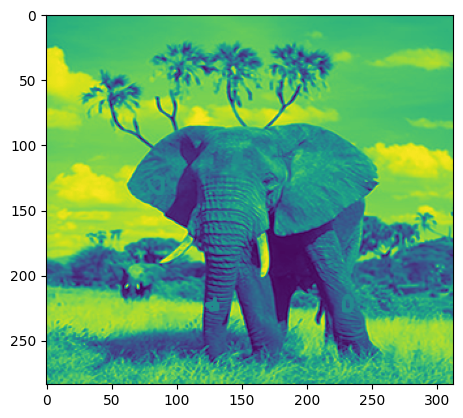

<ipython-input-82-3faa39be9e27>:16: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = scipy.ndimage.filters.convolve(a, kernel)


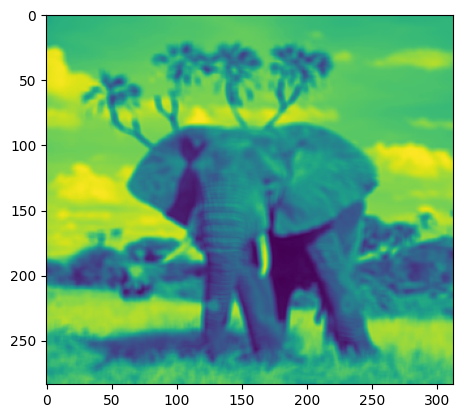

<ipython-input-82-3faa39be9e27>:28: DeprecationWarning: Please import `median_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = scipy.ndimage.filters.median_filter(a,size=5, footprint=None,output=None,mode='reflect',cval=0.0,origin=0)


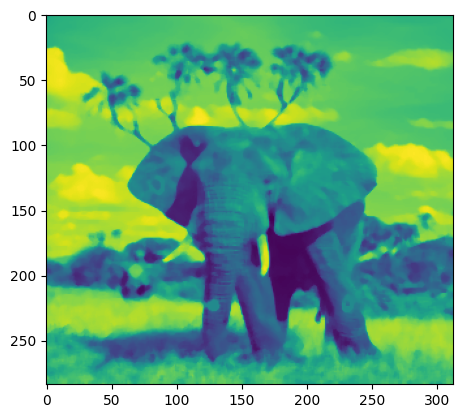

<ipython-input-82-3faa39be9e27>:35: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = scipy.ndimage.filters.maximum_filter(a,size=5, footprint=None,output=None,mode='reflect',cval=0.0,origin=0)
<ipython-input-82-3faa39be9e27>:40: DeprecationWarning: Please import `minimum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = scipy.ndimage.filters.minimum_filter(a,size=5, footprint=None,output=None,mode='reflect',cval=0.0,origin=0)


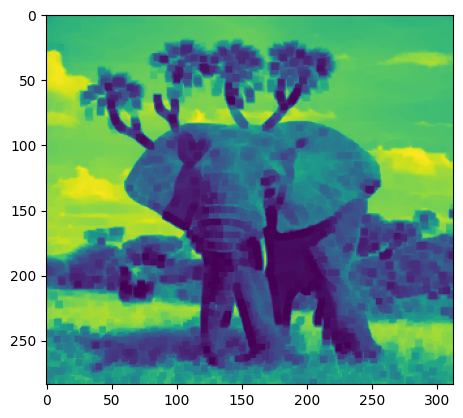

In [ ]:
import numpy as np
import scipy.ndimage
from PIL import Image
import scipy.misc as mi
import matplotlib.pyplot as plt

#Mean filter:
a = Image.open('elephant_marked.png').convert('L')
plt.imshow(np.array(a)); plt.show()

# initializing the filter of size 5 by 5. the filter is divided by 25 for normalization
kernel = np.ones((5,5))/25
np.sum(kernel)

# performing convolution
b = scipy.ndimage.filters.convolve(a, kernel)
plt.imshow(b)
plt.show()

#Median filter:
b = Image.fromarray(b)
b.save('elephant_marked_mean_filter.png')

# Median Filter
#The median lter is most commonly used in removing salt-and-pepper (black and white spots) noise and impulse

# performing the median filter
b = scipy.ndimage.filters.median_filter(a,size=5, footprint=None,output=None,mode='reflect',cval=0.0,origin=0)
plt.imshow(b)
plt.show()

#Max filter:
# Max Filter: This filter enhances the bright points in an image. More suitable for BW images
# performing maximum filter
b = scipy.ndimage.filters.maximum_filter(a,size=5, footprint=None,output=None,mode='reflect',cval=0.0,origin=0)
plt.imshow(b)

#Min filter:
# Min Filter: This filter is used to enhance the darkest points in an image
b = scipy.ndimage.filters.minimum_filter(a,size=5, footprint=None,output=None,mode='reflect',cval=0.0,origin=0)
plt.imshow(b)
plt.show()




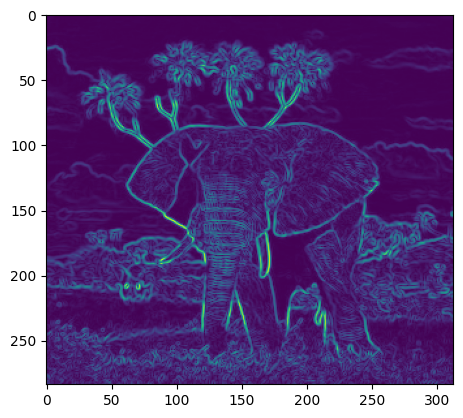

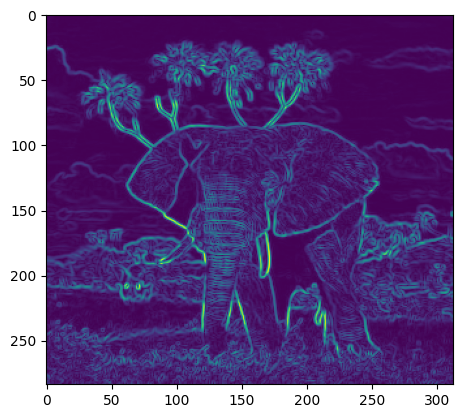

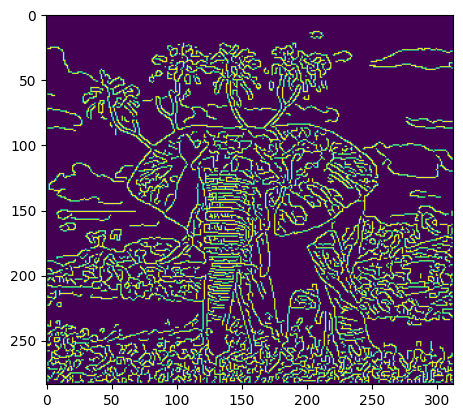

<ipython-input-83-c7b42d68e662>:25: DeprecationWarning: Please import `laplace` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b3 = scipy.ndimage.filters.laplace(a)


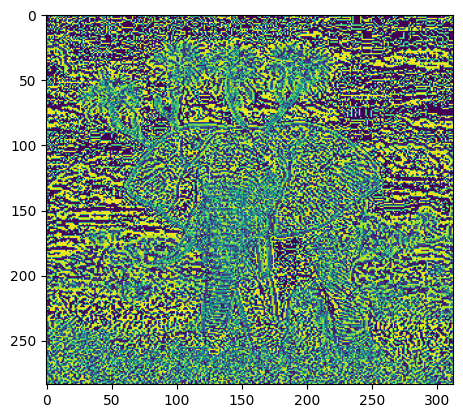

In [ ]:
from skimage import filters,feature
a = Image.open('elephant.png').convert('L')

# performing Sobel filter
b = filters.sobel(np.array(a))
plt.imshow(b)
plt.show()
#Use if one required -  vsobel, hsobel

# performing prewitt filter
b1 = filters.prewitt(np.array(a))
plt.imshow(np.array(b1))
plt.show()

# performing Canny filter
b2 = np.asarray(a).astype(float)
np.min(b2), np.max(b2) #Shold be 0-1 else normalize
b2 = b2/float(np.max(b2))

b2 = feature.canny(b2, sigma=1, low_threshold = 0.1, high_threshold = 0.2)
plt.imshow(b2)
plt.show()

# performing laplace filter
b3 = scipy.ndimage.filters.laplace(a)
plt.imshow(b3)
plt.show()


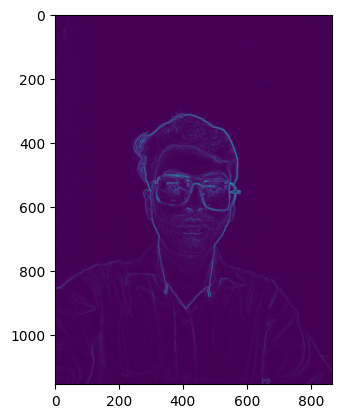

In [ ]:
from skimage import filters,feature
a = Image.open('pic1.jpg').convert('L')

# performing Sobel filter
b = filters.sobel(np.array(a))
plt.imshow(b)
plt.show()